In [1]:
import pandas as pd

# Load Tesla stock data
file_path = "TSLA.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [2]:
#handling the missing values
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

# Drop missing values
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


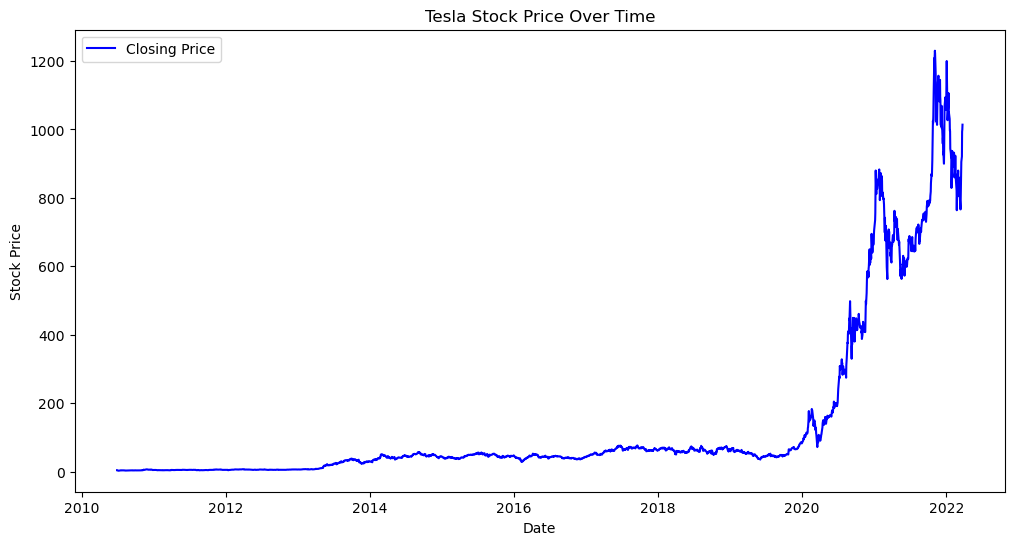

In [3]:
#EDA
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()


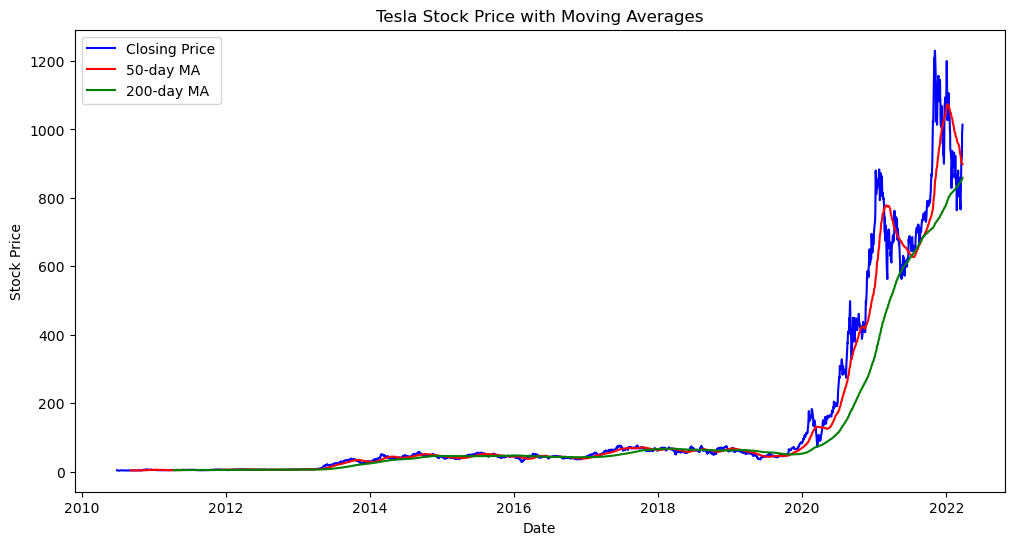

In [4]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Plot with Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label="Closing Price", color='blue')
plt.plot(df.index, df['MA50'], label="50-day MA", color='red')
plt.plot(df.index, df['MA200'], label="200-day MA", color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price with Moving Averages")
plt.legend()
plt.show()


In [5]:
#Train Test Split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df[['Close']])
# Split data (80% Train, 20% Test)
train_size = int(len(df) * 0.8)
train_data, test_data = df_scaled[:train_size], df_scaled[train_size:]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape data for LSTM
X_train, y_train = [], []
for i in range(50, len(train_data)):
    X_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=32)


C:\Users\Muskan\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 2.2763e-04
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.1170e-05
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.0119e-05
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.1113e-05
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 8.8442e-06
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 8.9737e-06
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 7.7831e-06
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 7.8368e-06
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 8.3660e-06
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 7.8595e-06
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 8.1206e-06
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 9.1095e-06
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 8.7473e-06
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 8.0806e-06
Epoch 15/50
73

In [ ]:
#Model prediction
import matplotlib.pyplot as plt

# Reverse scaling for actual prices
actual_prices = scaler.inverse_transform(test_data.reshape(-1, 1))  

# Ensure index and actual_prices have the same length
dates = df.index[-len(actual_prices):]  

# Plot Results
plt.figure(figsize=(12,6))
plt.plot(dates, actual_prices, label="Actual Prices", color='blue')
plt.plot(dates, predictions, label="Predicted Prices", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Prediction")
plt.legend()
plt.show()
